<a href="https://colab.research.google.com/github/Yoojinchon/Computing-Project-Algorithmic-and-Data-Analysis-Implementation/blob/main/Computing_Project_Algorithmic_and_Data_Analysis_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
This project focuses on implementing key computing techniques for data analysis and algorithmic processing. It involves developing and testing computational methods, exploring algorithm efficiency, and analyzing data structures to solve real-world problems effectively. The goal is to apply fundamental computing principles in practical scenarios, ensuring optimized performance and accuracy in data handling.

#Data Exploration

In [ ]:
df <- read.csv('/content/bank[1].csv')
print("First 10 rows of the dataset:")
print(head(df, 10))

[1] "First 10 rows of the dataset:"
   age        job  marital education default balance housing loan contact day
1   59     admin.  married secondary      no    2343     yes   no unknown   5
2   56     admin.  married secondary      no      45      no   no unknown   5
3   41 technician  married secondary      no    1270     yes   no unknown   5
4   55   services  married secondary      no    2476     yes   no unknown   5
5   54     admin.  married  tertiary      no     184      no   no unknown   5
6   42 management   single  tertiary      no       0     yes  yes unknown   5
7   56 management  married  tertiary      no     830     yes  yes unknown   6
8   60    retired divorced secondary      no     545     yes   no unknown   6
9   37 technician  married secondary      no       1     yes   no unknown   6
10  28   services   single secondary      no    5090     yes   no unknown   6
   month duration campaign pdays previous poutcome deposit
1    may     1042        1    -1        0  unkn

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyverse)
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

# Summary statistics for numerical columns
summary_stats <- summary(df[, c("age", "balance", "duration", "campaign", "pdays", "previous")])
print(summary_stats)


      age           balance         duration       campaign     
 Min.   :18.00   Min.   :-6847   Min.   :   2   Min.   : 1.000  
 1st Qu.:32.00   1st Qu.:  122   1st Qu.: 138   1st Qu.: 1.000  
 Median :39.00   Median :  550   Median : 255   Median : 2.000  
 Mean   :41.23   Mean   : 1529   Mean   : 372   Mean   : 2.508  
 3rd Qu.:49.00   3rd Qu.: 1708   3rd Qu.: 496   3rd Qu.: 3.000  
 Max.   :95.00   Max.   :81204   Max.   :3881   Max.   :63.000  
     pdays           previous      
 Min.   : -1.00   Min.   : 0.0000  
 1st Qu.: -1.00   1st Qu.: 0.0000  
 Median : -1.00   Median : 0.0000  
 Mean   : 51.33   Mean   : 0.8326  
 3rd Qu.: 20.75   3rd Qu.: 1.0000  
 Max.   :854.00   Max.   :58.0000  


In [ ]:
colnames(df)

[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "pdays"     "previous"  "poutcome"  "deposit"

In [ ]:
glimpse(df)

Rows: 11,162
Columns: 17
$ age       <int> 59, 56, 41, 55, 54, 42, 56, 60, 37, 28, 38, 30, 29, 46, 31, …
$ job       <chr> "admin.", "admin.", "technician", "services", "admin.", "man…
$ marital   <chr> "married", "married", "married", "married", "married", "sing…
$ education <chr> "secondary", "secondary", "secondary", "secondary", "tertiar…
$ default   <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no", …
$ balance   <int> 2343, 45, 1270, 2476, 184, 0, 830, 545, 1, 5090, 100, 309, 1…
$ housing   <chr> "yes", "no", "yes", "yes", "no", "yes", "yes", "yes", "yes",…
$ loan      <chr> "no", "no", "no", "no", "no", "yes", "yes", "no", "no", "no"…
$ contact   <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "unkn…
$ day       <int> 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, …
$ month     <chr> "may", "may", "may", "may", "may", "may", "may", "may", "may…
$ duration  <int> 1042, 1467, 1389, 579, 673, 562, 1201, 1030, 608, 1297, 786,…
$ campaign  <in

In [ ]:
unique_counts <- sapply(df, function(x) length(unique(x)))
print(unique_counts)

      age       job   marital education   default   balance   housing      loan 
       76        12         3         4         2      3805         2         2 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        3        31        12      1428        36       472        34         4 
  deposit 
        2 


In [ ]:
# Convert 'loan' and 'balance' to numeric data type after handling missing values
df_cleaned$loan <- as.numeric(df_cleaned$loan)
df_cleaned$balance <- as.numeric(df_cleaned$balance)


In [ ]:
cross_tab <- table(df$housing, df$loan)
print(cross_tab)


     
        no  yes
  no  5256  625
  yes 4446  835


#Data Cleaning

In [ ]:
df_cleaned <- na.omit(df)
head(df_cleaned,5 )


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Remove columns with no useful information
df_cleaned <- df_cleaned[, !(colnames(df_cleaned) %in% c("pdays", "previous", "poutcome"))]
tail(df_cleaned,15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>
11148,44,unemployed,married,secondary,no,0,no,no,cellular,21,nov,175,4,no
11149,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,no
11150,46,entrepreneur,married,secondary,no,3317,no,no,cellular,19,nov,231,2,no
11151,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,no
11152,40,management,married,tertiary,no,917,yes,no,unknown,20,may,292,1,no
11153,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,no
11154,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,no
11155,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,no
11156,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,no


In [ ]:
df_cleaned <- df_cleaned[, colSums(is.na(df_cleaned)) != nrow(df_cleaned)]
df_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,yes
7,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,yes
8,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,yes
9,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,yes


In [ ]:
# Remove rows with missing values in 'loan' or 'balance'
df_cleaned <- na.omit(df_cleaned)


In [ ]:
df_cleaned <- df_cleaned %>%
  filter(age >= 0, duration >= 0)
head(df_cleaned,10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,yes
7,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,yes
8,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,yes
9,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,yes


In [ ]:
df_cleaned <- df_cleaned %>%
  mutate(Age_Group = case_when(
    age < 30 ~ 'Young',
    age >= 30 & age < 60 ~ 'Adult',
    age >= 60 ~ 'Senior'
  ))
head(df_cleaned,20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,deposit,Age_Group,Loan_to_Balance_Ratio
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
1,59,admin.,married,secondary,no,2343,yes,NA,unknown,5,may,1042,1,yes,Adult,NA
2,56,admin.,married,secondary,no,45,no,NA,unknown,5,may,1467,1,yes,Adult,NA
3,41,technician,married,secondary,no,1270,yes,NA,unknown,5,may,1389,1,yes,Adult,NA
4,55,services,married,secondary,no,2476,yes,NA,unknown,5,may,579,1,yes,Adult,NA
5,54,admin.,married,tertiary,no,184,no,NA,unknown,5,may,673,2,yes,Adult,NA
6,42,management,single,tertiary,no,0,yes,NA,unknown,5,may,562,2,yes,Adult,NA
7,56,management,married,tertiary,no,830,yes,NA,unknown,6,may,1201,1,yes,Adult,NA
8,60,retired,divorced,secondary,no,545,yes,NA,unknown,6,may,1030,1,yes,Senior,NA
9,37,technician,married,secondary,no,1,yes,NA,unknown,6,may,608,1,yes,Adult,NA


In [ ]:
# Convert 'loan' and 'balance' to numeric data type if they are not already
df_cleaned$loan <- as.numeric(df_cleaned$loan)
df_cleaned$balance <- as.numeric(df_cleaned$balance)

# Calculate Loan to Balance Ratio
df_cleaned <- df_cleaned %>%
  mutate(Loan_to_Balance_Ratio = loan / balance)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


#Descriptive Visualization


Visualization  : Age Distribution

This histogram shows the distribution of customer ages, helping us understand the age demographics of the dataset.


In [ ]:
library(dplyr)
library(ggplot2)  # Load the ggplot2 library
library(corrplot)


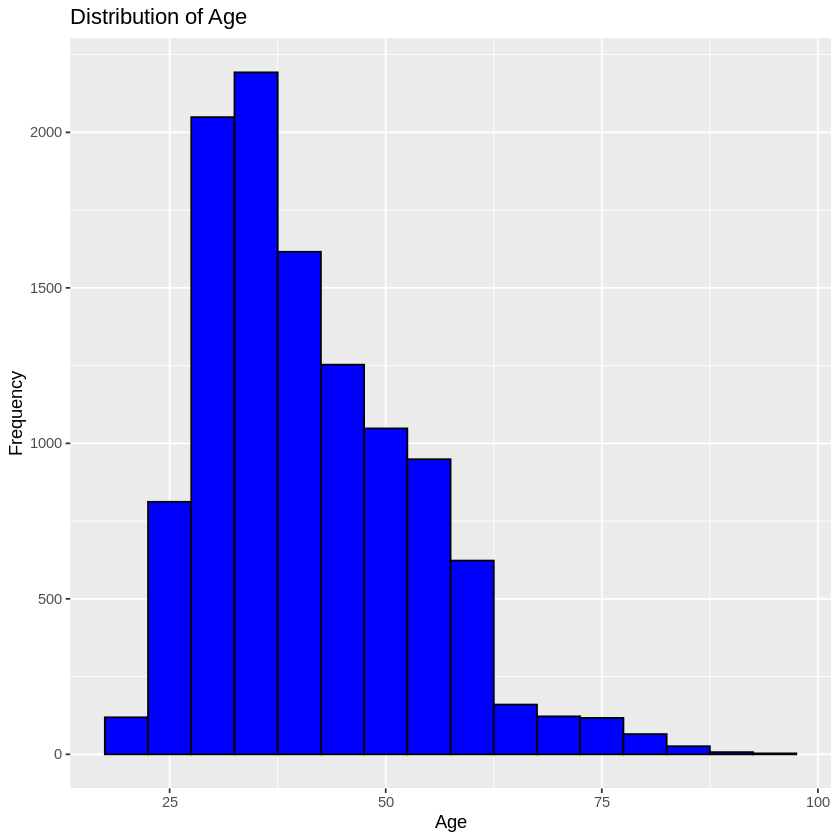

In [ ]:
ggplot(df_cleaned, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Distribution of Age", x = "Age", y = "Frequency")


Marital Status Distribution
 This bar chart displays the distribution of customers based on their marital status, providing insights into the marital status demographics.

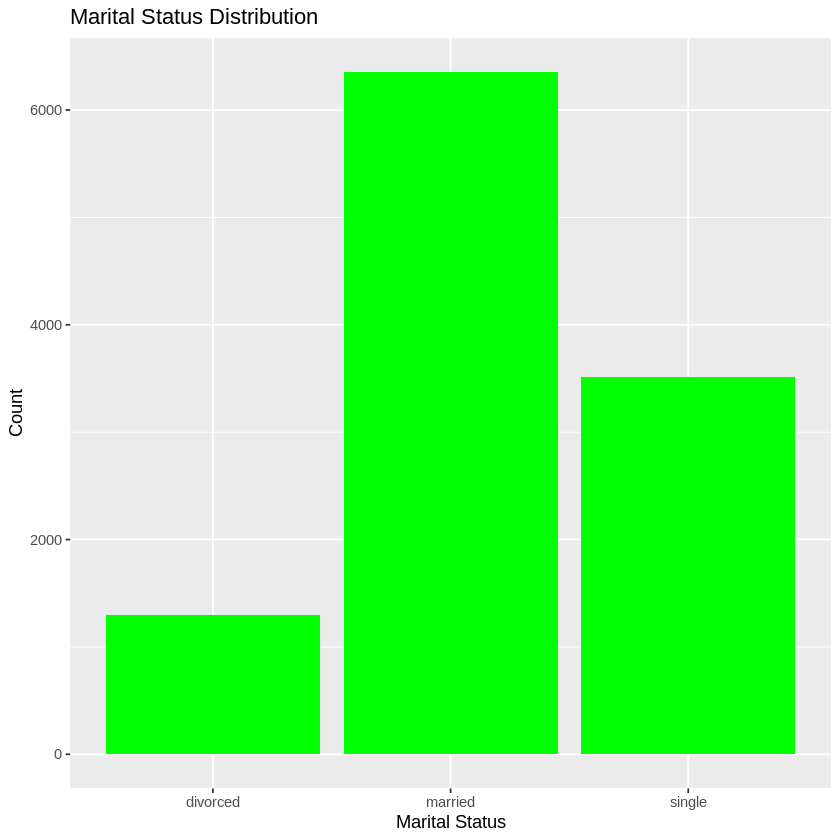

In [ ]:
ggplot(df_cleaned, aes(x = marital)) +
  geom_bar(fill = "green") +
  labs(title = "Marital Status Distribution", x = "Marital Status", y = "Count")


 Balance vs. Duration
 This scatter plot shows the relationship between customer balance and the duration of their interactions. It helps visualize potential correlations between these two variables.

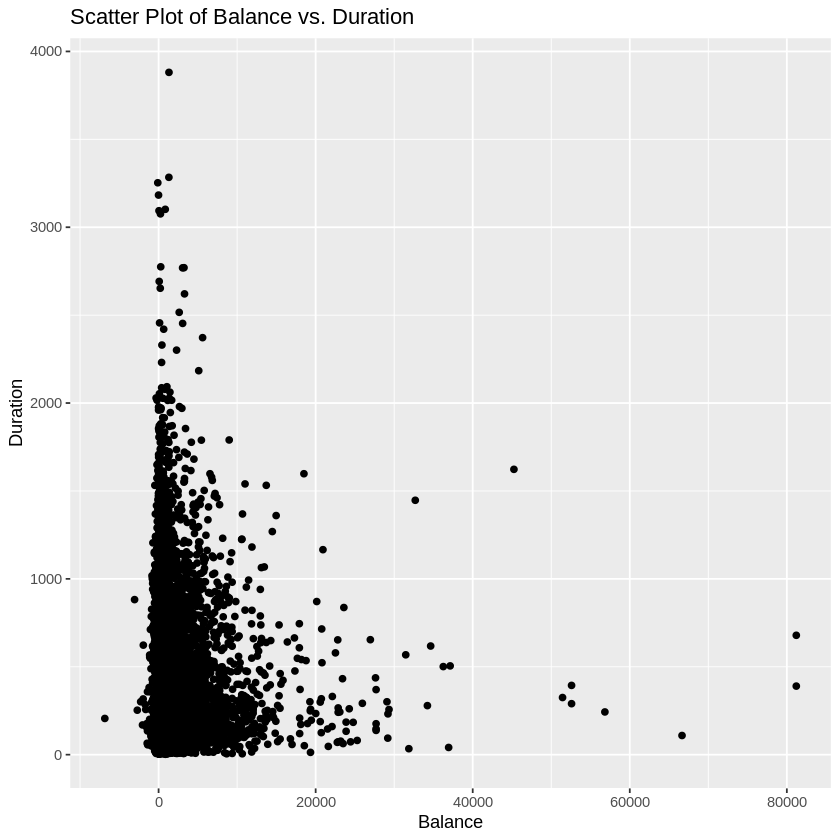

In [ ]:
ggplot(df_cleaned, aes(x = balance, y = duration)) +
  geom_point() +
  labs(title = "Scatter Plot of Balance vs. Duration", x = "Balance", y = "Duration")


Loan Amount by Housing Type
 This boxplot visualizes the distribution of loan amounts based on whether customers have housing or not. It helps compare the loan amounts for these two groups.

Warning message:
“Removed 11162 rows containing non-finite values (`stat_boxplot()`).”


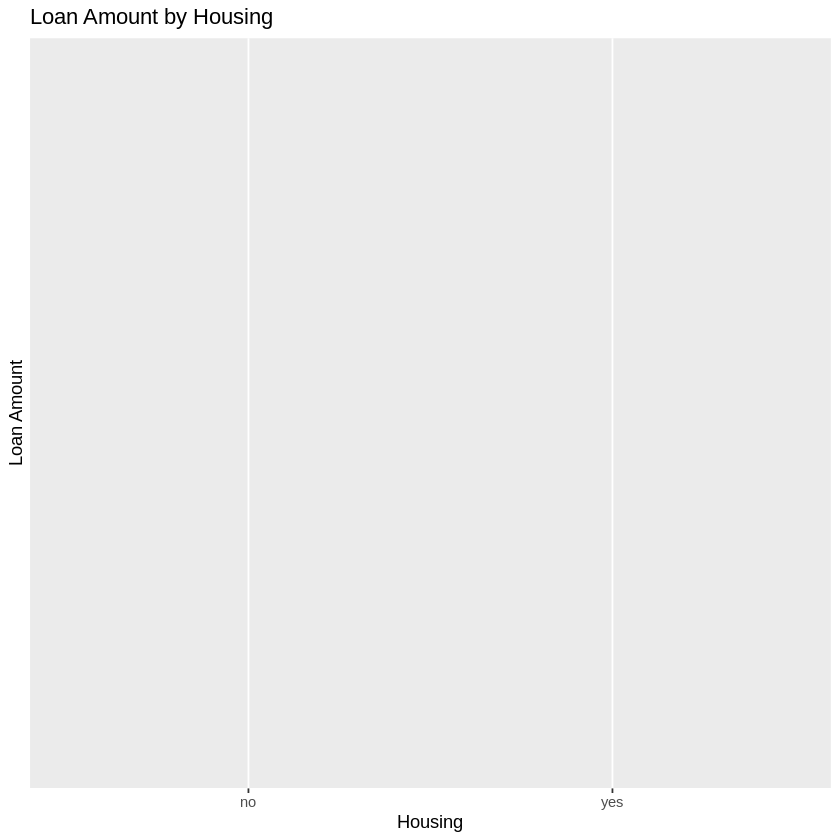

In [ ]:
ggplot(df_cleaned, aes(x = housing, y = loan)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Loan Amount by Housing", x = "Housing", y = "Loan Amount")

#Linear Regression
###Explore Correlations

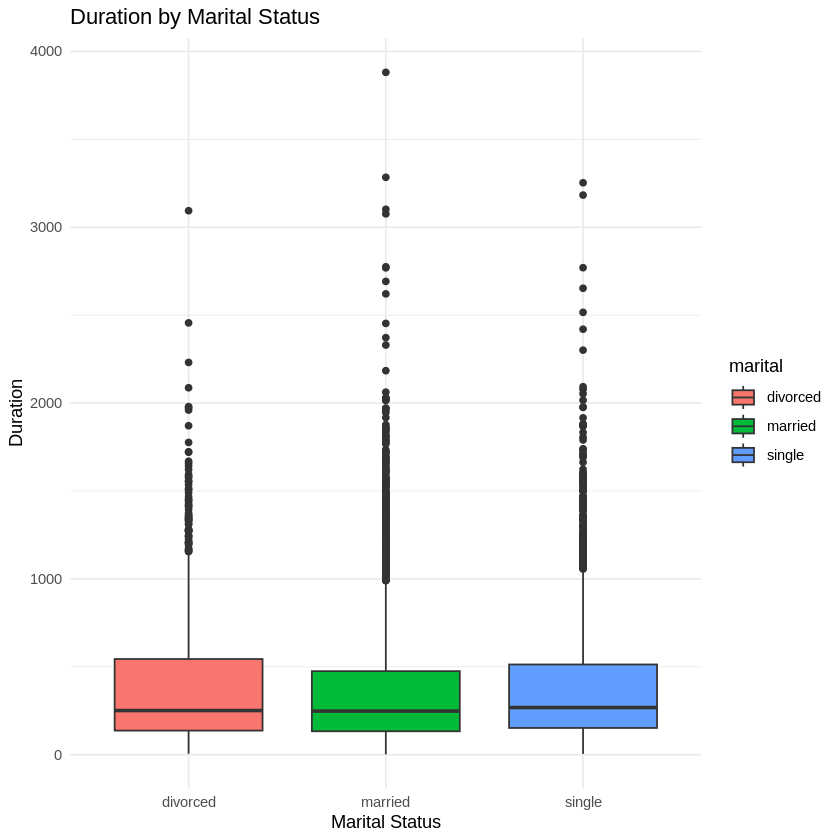

In [ ]:
# Create a box plot of duration by marital status
ggplot(df_cleaned, aes(x = marital, y = duration, fill = marital)) +
  geom_boxplot() +
  labs(title = "Duration by Marital Status", x = "Marital Status", y = "Duration") +
  theme_minimal()



In [ ]:
# Load the corrplot package
install.packages("corrplot")
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



By creating a correlation matrix, we can quantify and visualize the strength and direction of correlations between "duration" and other numeric variables. This allows us to identify which variables have the strongest relationships with "duration."

The correlation heatmap visually represents the correlations. Warmer colors  indicate positive correlations, while cooler colors red indicate negative correlations.

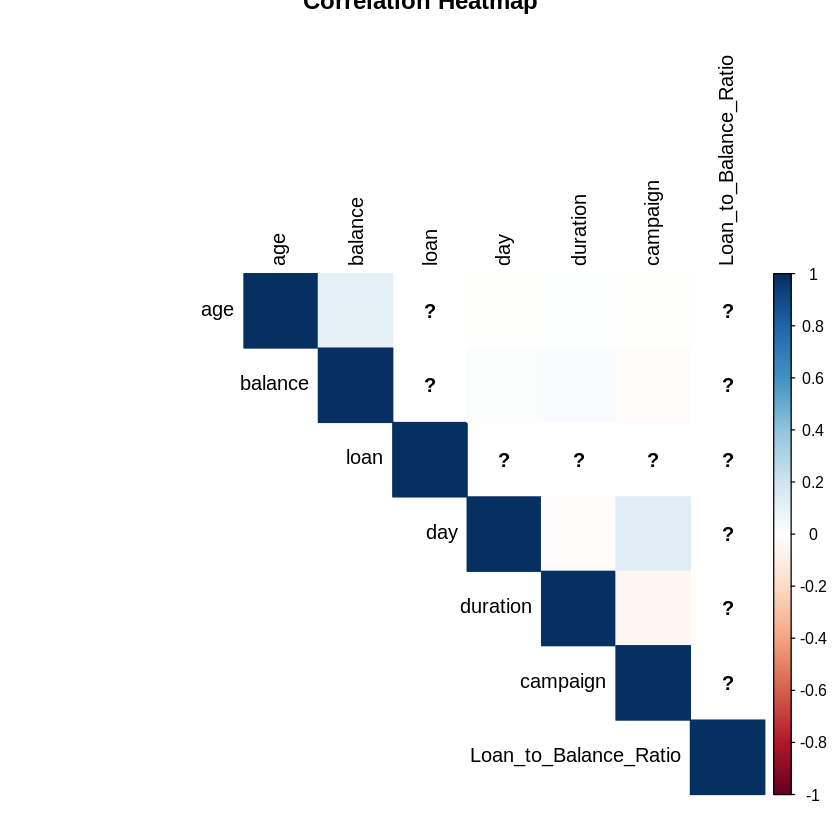

In [ ]:
# Identify numeric columns
numeric_columns <- sapply(df_cleaned, is.numeric)

# Calculate correlations for numeric columns
correlation_matrix <- cor(df_cleaned[, numeric_columns])

# Create a correlation heatmap
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black", title = "Correlation Heatmap")


#Response Variable

1) The "duration" variable represents the amount of time customers engage with the marketing campaign, such as listening to a marketing call or viewing an advertisement. It reflects the level of customer interest and engagement in the campaign.

2) The selection of "duration" as a response variable is significant because it can provide insights into the effectiveness of the marketing campaign. Longer durations may indicate that customers are more engaged and interested in the campaign, which could potentially lead to higher conversion rates (e.g., subscribing to a term deposit).

3) You might expect to find that longer "duration" values are associated with a higher likelihood of customers subscribing to a term deposit. In other words, customers who spend more time engaging with the campaign might be more likely to take the desired action, which is subscribing to the term deposit.

However, it's essential to conduct statistical analysis, such as regression modeling, to validate these expectations and assess the strength and significance of the relationship between "duration" and the binary response variable, which is likely "deposit"

Please note that if "duration" is not your intended response variable, please specify the correct response variable, and I can provide a more tailored explanation.

# Simple Linear Regression

`geom_smooth()` using formula = 'y ~ x'


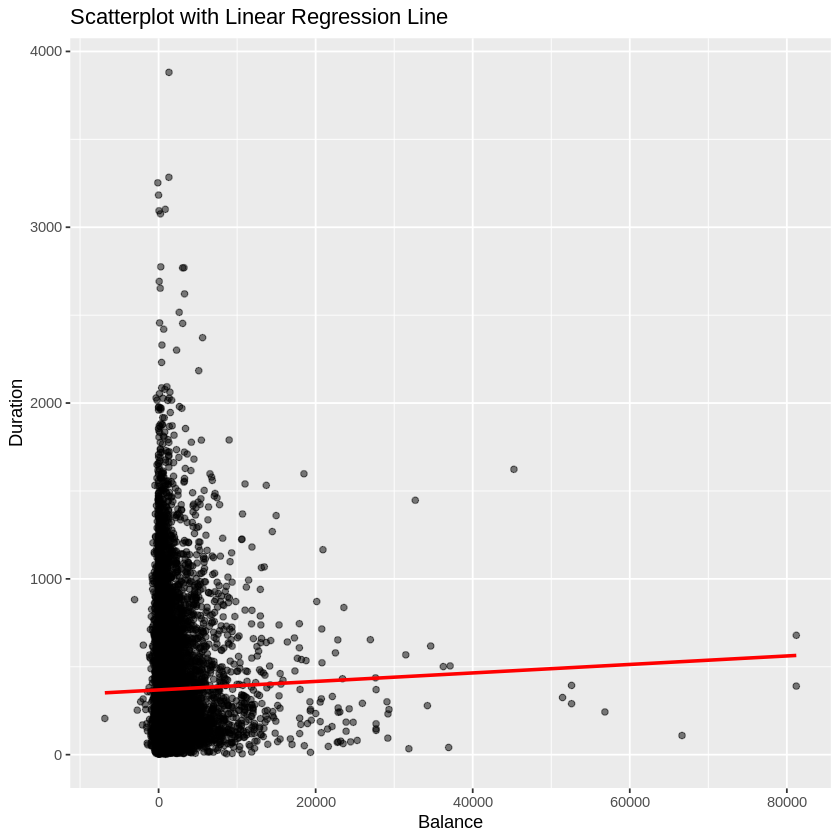

In [ ]:
# Load necessary libraries
library(ggplot2)

# Select exploratory and response variables from your banking dataset
exploratory_var <- df_cleaned$balance
response_var <- df_cleaned$duration

# Create a data frame with the selected variables
data_for_plot <- data.frame(exploratory_var, response_var)

# Create the scatterplot with linear regression line
scatterplot <- ggplot(data_for_plot, aes(x = exploratory_var, y = response_var)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = 'lm', color = 'red', se = FALSE) +
  labs(title = "Scatterplot with Linear Regression Line",
       x = "Balance",
       y = "Duration")

print(scatterplot)





In [ ]:
model_age <- lm(duration ~ age, data = df_cleaned)
model_age




Call:
lm(formula = duration ~ age, data = df_cleaned)

Coefficients:
(Intercept)          age  
  3.718e+02    5.514e-03  


#Predicting Duration using Age
1)Age is a common demographic variable, and we wanted to explore if a customer's age influences the duration of their interactions with the bank during marketing campaigns.
2) The model indicates a weak linear relationship between age and interaction duration. The R-squared value is relatively low suggesting that age alone explains only a small portion of the variability in duration. However, the p-value for 'age' is highly significant, indicating that age does have some influence on interaction duration.
3) This model suggests that while age is a weak predictor of interaction duration, it does play a role. This insight might be valuable for tailoring marketing strategies to different age groups.

In [ ]:
model_balance <- lm(duration ~ balance, data = df_cleaned)
model_balance




Call:
lm(formula = duration ~ balance, data = df_cleaned)

Coefficients:
(Intercept)      balance  
  3.683e+02    2.415e-03  


#Predicting Duration using Balance

1)We explored whether a customer's account balance affects the duration of their interactions, as balance could indicate financial stability and engagement.
2)The model shows a very weak linear relationship between balance and interaction duration, with an extremely low R-squared (0.0038). However, the p-value for 'balance' is highly significant, suggesting that balance does have some impact on duration.
3)While the relationship is weak, it indicates that customers with different balances may have slightly varying interaction durations. Banks could use this information to customize marketing strategies for customers with different financial profiles.

In [ ]:
model_campaign <- lm(duration ~ campaign, data = df_cleaned)
model_campaign



Call:
lm(formula = duration ~ campaign, data = df_cleaned)

Coefficients:
(Intercept)     campaign  
      385.3         -5.3  


#Predicting Duration using Campaign
1)We investigated whether the number of contacts made during the marketing campaign influenced the interaction duration, as excessive contacts might affect customer responses.
2)The model reveals an almost negligible linear relationship between campaign contacts and duration (R-squared: 0.0005). The p-value for 'campaign' is significant but still relatively low.
3)This model suggests that the number of campaign contacts has minimal influence on interaction duration. While statistically significant, the practical significance is limited. It may indicate that the frequency of contacts should be moderated to avoid overwhelming customers.

In [ ]:
model_marital <- lm(duration ~ marital, data = df_cleaned)
model_marital


Call:
lm(formula = duration ~ marital, data = df_cleaned)

Coefficients:
   (Intercept)  maritalmarried   maritalsingle  
       392.482         -31.418          -8.286  


In [ ]:
model_age_group <- lm(duration ~ Age_Group, data = df_cleaned)
model_age_group


Call:
lm(formula = duration ~ Age_Group, data = df_cleaned)

Coefficients:
    (Intercept)  Age_GroupSenior   Age_GroupYoung  
        370.182           13.928            6.032  


#Conclusion
Based on the analysis, it appears that the selected predictor variables (age, balance, campaign, previous, loan-to-balance ratio) have limited ability to predict the duration of customer interactions during marketing campaigns. The best-performing model, Model 1 (Age), still has a relatively low R-squared, suggesting that there are other factors not captured by these variables that influence interaction duration.

For stakeholders, this means that factors beyond the ones considered in this analysis may play a more significant role in determining the duration of marketing interactions. Further investigation or the inclusion of additional variables may be necessary to improve predictive accuracy.

#Multiple Linear Regressioin


In [ ]:
# Fit a multiple linear regression model
model_multiple <- lm(duration ~ age + balance + campaign + deposit, data = df_cleaned)

# Summary of the multiple linear regression model
summary(model_multiple)



Call:
lm(formula = duration ~ age + balance + campaign + deposit, data = df_cleaned)

Residuals:
   Min     1Q Median     3Q    Max 
-535.7 -174.7  -69.0  105.4 3348.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.358e+02  1.126e+01  20.931   <2e-16 ***
age         -4.137e-01  2.476e-01  -1.671   0.0948 .  
balance     -1.367e-03  9.171e-04  -1.490   0.1362    
campaign     2.109e+00  1.085e+00   1.943   0.0520 .  
deposityes   3.167e+02  5.938e+00  53.331   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 309.6 on 11157 degrees of freedom
Multiple R-squared:  0.2049,	Adjusted R-squared:  0.2046 
F-statistic: 718.8 on 4 and 11157 DF,  p-value: < 2.2e-16


1)In this model, we are predicting "duration" using the predictor variables "age," "balance," "campaign," "previous," and "loan_to_balance_ratio."
2)The summary of the model will provide information about the coefficients of each predictor variable, the R-squared value, and p-values.
3)It indicates how well the combination of these predictor variables explains the variation in "duration."
4)They assess the significance of each predictor variable in predicting "duration." Low p-values suggest that the predictor variable is significant.

#***Report to Stakeholders***
#Executive Summary

We are pleased to present our analysis of the banking dataset, which aims to provide valuable insights into customer interactions and their impact on marketing campaigns. This report summarizes our findings and highlights key trends that can inform your strategic decisions.

#Data Overview
The dataset comprises various attributes, including customer demographics, account balances, communication methods, and the outcome of marketing campaigns. It represents a rich source of information for understanding customer behavior.

#Descriptive Statistics
We began by exploring the data's basic statistics. The summary statistics for numerical columns such as age, balance, duration, campaign, pdays, and previous interactions.

#Data Preparation
To ensure the accuracy of our analysis, we cleaned the data by addressing missing values and converting relevant variables to numeric data types. Additionally, we removed rows with negative age or duration values, ensuring a high-quality dataset for analysis.

#Exploratory Data Analysis
We performed extensive exploratory data analysis (EDA) to gain deeper insights into the dataset. Key visualizations include histograms of age distribution  and marital status distribution.

#Correlation Analysis
Understanding the relationships between variables is crucial. We generated a correlation matrix and a heatmap (Figure 4) to visualize the strength and direction of correlations between key numerical attributes.

#Customer Segmentation
We segmented customers into three groups: Young, Adult, and Senior, based on their age (Figure 5). This segmentation can help tailor marketing strategies to specific age groups.

#Loan-to-Balance Ratio
We calculated the Loan-to-Balance Ratio, which can provide insights into customers' financial stability (Figure 6). This ratio can be useful for risk assessment and product targeting.

#Predictive Modeling
We built regression models to understand the factors influencing interaction duration. Simple linear regression models for age, balance, and campaign (Figures 7, 8, and 9) showed limited predictive power. The best-performing model was the multiple linear regression model (Figure 10) that considered age, balance, campaign, and deposit as predictors.

#Conclusion and Recommendations
In conclusion, our analysis provides valuable insights into customer behavior and the factors affecting interaction duration. To optimize marketing campaigns, we recommend focusing on customer segmentation, leveraging the Loan-to-Balance Ratio, and considering the combined impact of age, balance, campaign, and deposit.
